In [883]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC

In [762]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [763]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [764]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [765]:
print(df_train.columns.size)
print(len(df_train))

12
891


In [766]:
print(df_test.columns.size)
print(len(df_test))

11
418


In [767]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [768]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [769]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

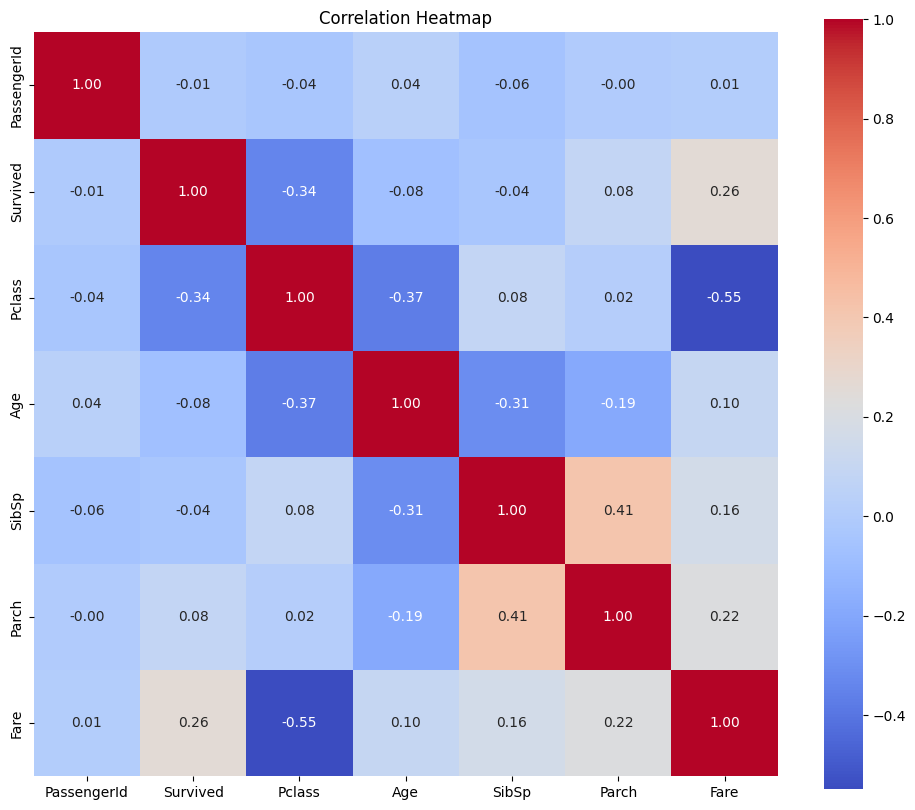

In [770]:
mat = df_train[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].corr()

def heat_map(df:pd.DataFrame):
    plt.figure(figsize=(12,10))
    sns.heatmap(mat, annot=True, fmt='.2f', square=True,cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()


heat_map(df_train)

## 1.2 Анализ целевой переменной Survived


In [771]:

print("Распределение Survived:")
print(df_train['Survived'].value_counts())
print("\nПроцентное распределение:")
print(df_train['Survived'].value_counts(normalize=True) * 100)


Распределение Survived:
Survived
0    549
1    342
Name: count, dtype: int64

Процентное распределение:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


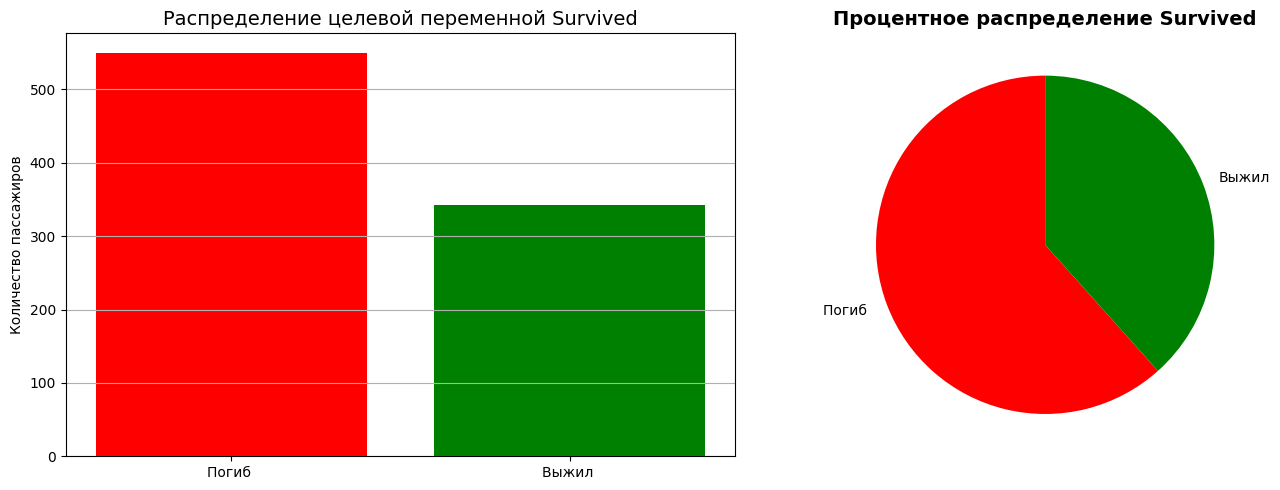

In [772]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].bar(['Погиб ', 'Выжил '], df_train['Survived'].value_counts().sort_index(), 
            color=['red', 'green'])
axes[0].set_title('Распределение целевой переменной Survived', fontsize=14)
axes[0].set_ylabel('Количество пассажиров')
axes[0].grid(axis='y')

survived_counts = df_train['Survived'].value_counts()
axes[1].pie(survived_counts, labels=['Погиб ', 'Выжил'],
            colors=['red', 'green'], startangle=90)
axes[1].set_title('Процентное распределение Survived', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


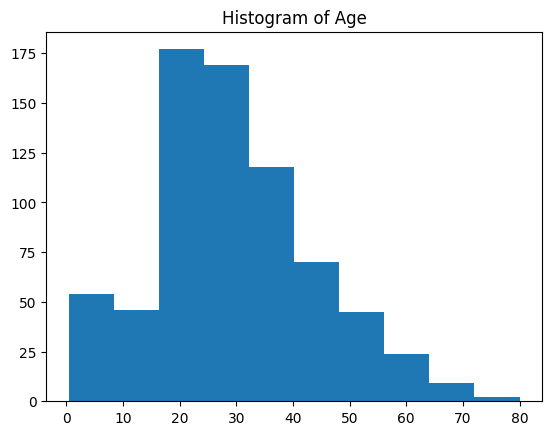

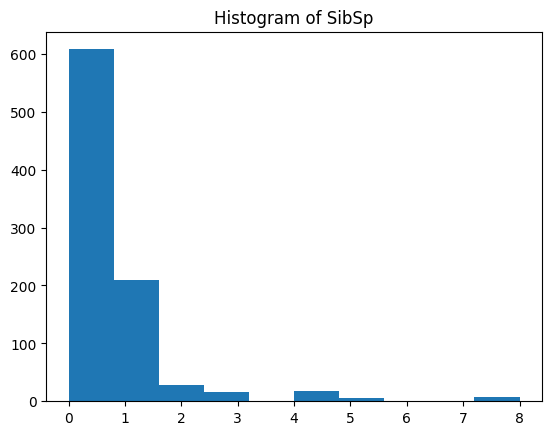

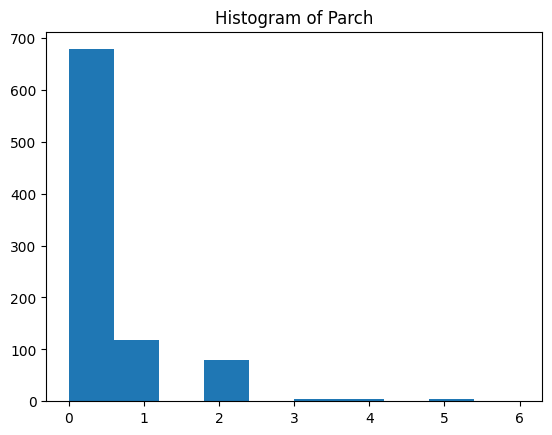

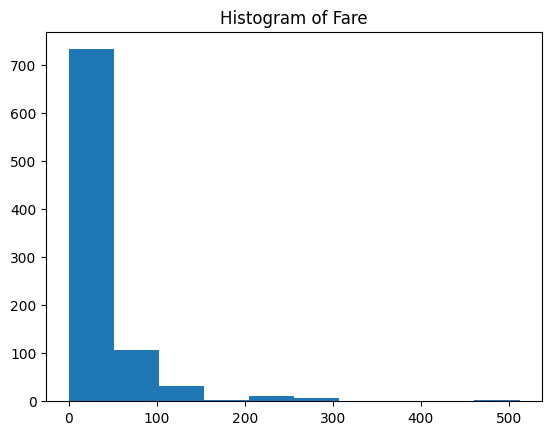

In [773]:

def make_hist(df:pd.DataFrame,list_col=['Age','SibSp','Parch','Fare']):
    for i in list_col:
        plt.figure()
        plt.hist(df[i].dropna())
        plt.title(f'Histogram of {i}')
        plt.show()
make_hist(df_train)

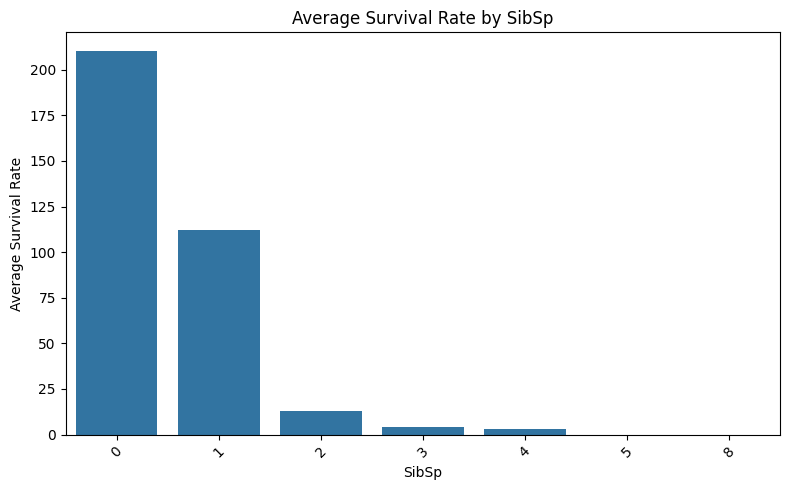

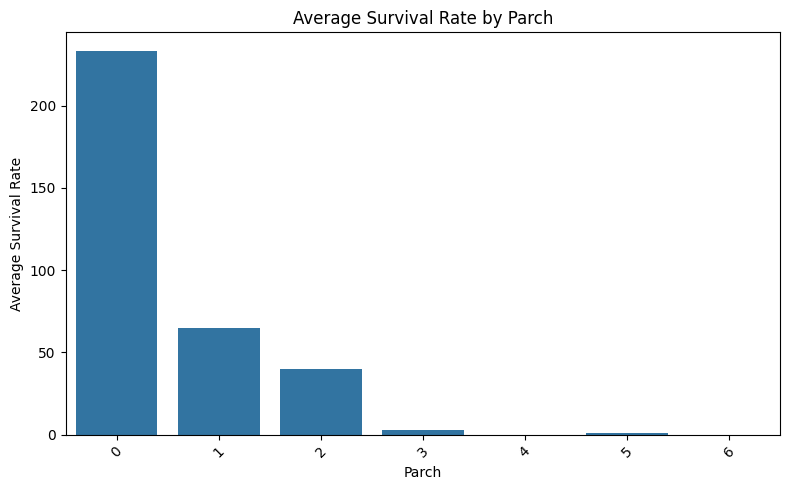

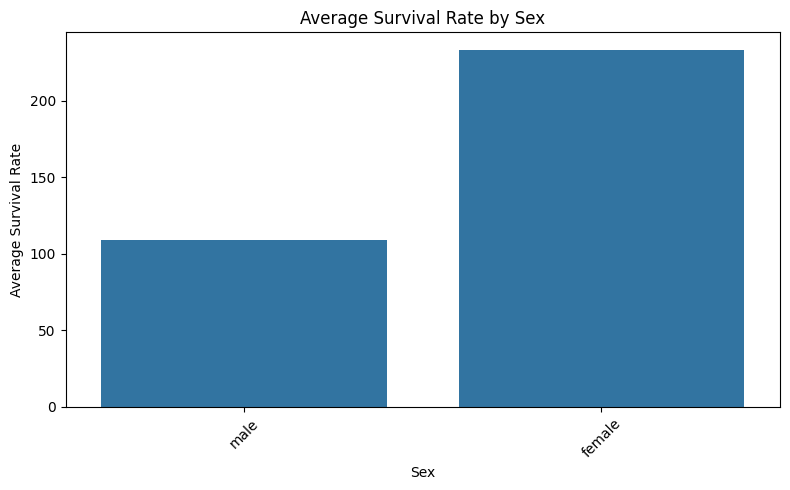

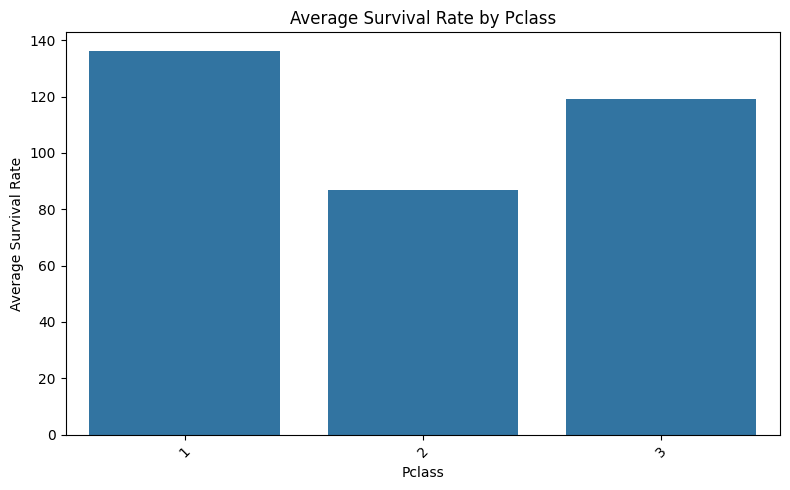

In [774]:
def bar_plot(df: pd.DataFrame, list_col=['SibSp', 'Parch', 'Sex', 'Pclass']):
    for i in list_col:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=i, y='Survived', data=df, estimator=sum, errorbar=None)
        plt.title(f'Average Survival Rate by {i}')
        plt.xlabel(i)
        plt.ylabel('Average Survival Rate')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
bar_plot(df_train)

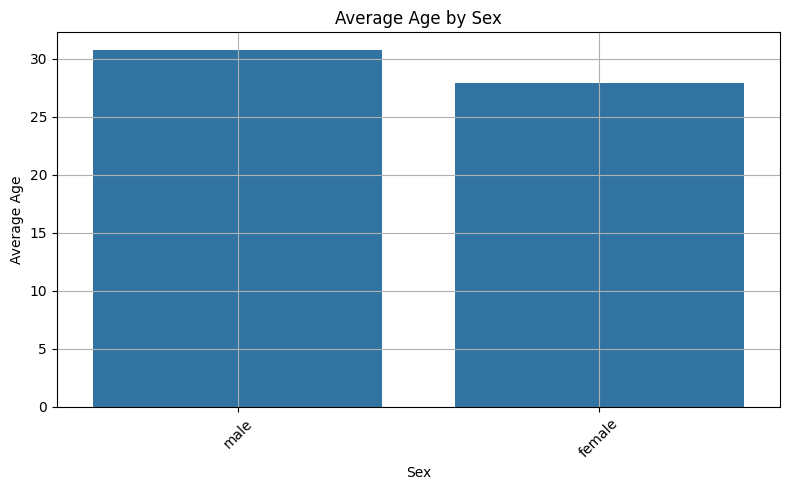

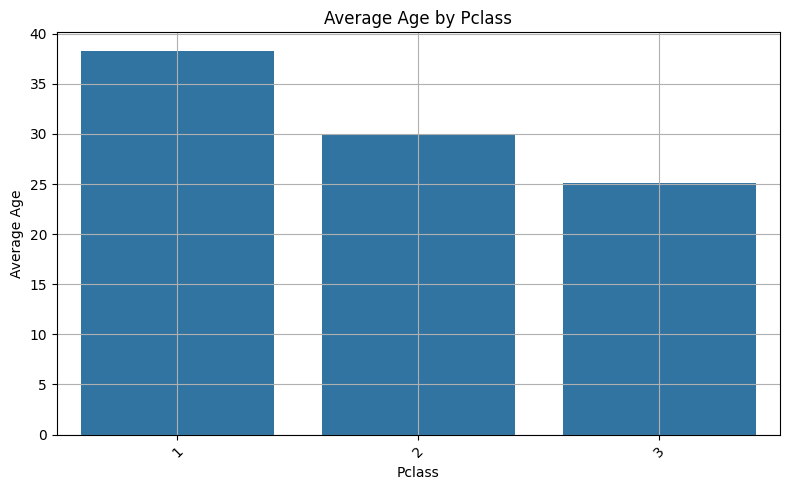

In [775]:
def bar_plot_age(df: pd.DataFrame, list_col=['Sex', 'Pclass']):
    for i in list_col:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=i, y='Age', data=df, errorbar=None)
        plt.title(f'Average Age by {i}')
        plt.xlabel(i)
        plt.ylabel('Average Age')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True)
        plt.show()
bar_plot_age(df_train)

## 1.3 Анализ числовых признаков


In [776]:

numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
print("Детальная статистика числовых признаков:")
print(df_train[numeric_cols].describe())


Детальная статистика числовых признаков:
              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


In [777]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [778]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [779]:
df_train.groupby('Pclass',as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [780]:
df_train.groupby('Sex',as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [781]:
df_train.groupby('SibSp',as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [782]:
df_train.groupby('Parch',as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [783]:
df_train.groupby('Embarked',as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [784]:
df_train["Age_slice"] = pd.qcut(df_train['Age'],8)
df_test["Age_slice"] = pd.qcut(df_test['Age'],8)
df_train.groupby('Age_slice',as_index=False)['Survived'].mean()

/var/folders/72/4mtt73b16w9d91czh1zfsg540000gn/T/ipykernel_76016/3289260251.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby('Age_slice',as_index=False)['Survived'].mean()


,Age_slice,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


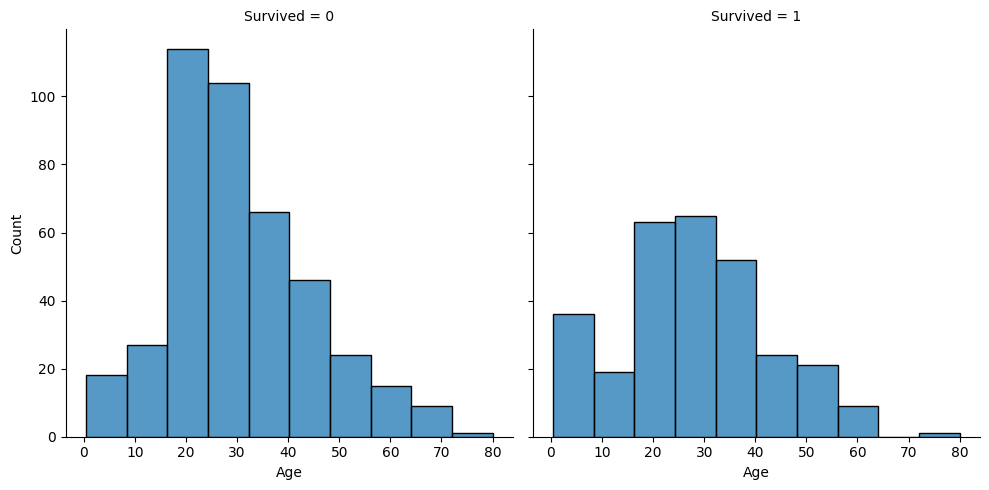

In [785]:
sns.displot(df_train,x='Age',col='Survived',height=5,binwidth=8)
plt.show()

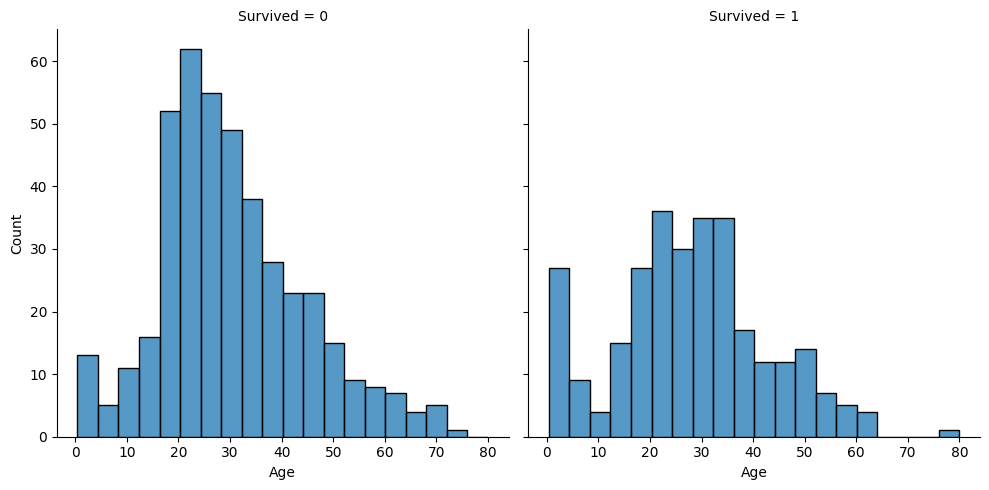

In [786]:
sns.displot(df_train,x='Age',col='Survived')
plt.show()

In [787]:
df_train.loc[df_train['Age'] <= 16,'Age'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 20.125),'Age'] = 1
df_train.loc[(df_train['Age'] > 20.125) & (df_train['Age'] <= 24),'Age'] = 2
df_train.loc[(df_train['Age'] > 24) & (df_train['Age'] <= 28),'Age'] = 3
df_train.loc[(df_train['Age'] > 28) & (df_train['Age'] <= 32.312),'Age'] = 4
df_train.loc[(df_train['Age'] > 32.312) & (df_train['Age'] <= 38),'Age'] = 5
df_train.loc[(df_train['Age'] > 38) & (df_train['Age'] <= 47),'Age'] = 6
df_train.loc[(df_train['Age'] > 47) & (df_train['Age'] <= 80),'Age'] = 7
df_train.loc[(df_train['Age'] > 80),'Age'] = 8

df_test.loc[df_test['Age'] <= 16,'Age'] = 0
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 20.125),'Age'] = 1
df_test.loc[(df_test['Age'] > 20.125) & (df_test['Age'] <= 24),'Age'] = 2
df_test.loc[(df_test['Age'] > 24) & (df_test['Age'] <= 28),'Age'] = 3
df_test.loc[(df_test['Age'] > 28) & (df_test['Age'] <= 32.312),'Age'] = 4
df_test.loc[(df_test['Age'] > 32.312) & (df_test['Age'] <= 38),'Age'] = 5
df_test.loc[(df_test['Age'] > 38) & (df_test['Age'] <= 47),'Age'] = 6
df_test.loc[(df_test['Age'] > 47) & (df_test['Age'] <= 80),'Age'] = 7
df_test.loc[(df_test['Age'] > 80),'Age'] = 8


In [788]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_slice
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,"(32.312, 38.0]"


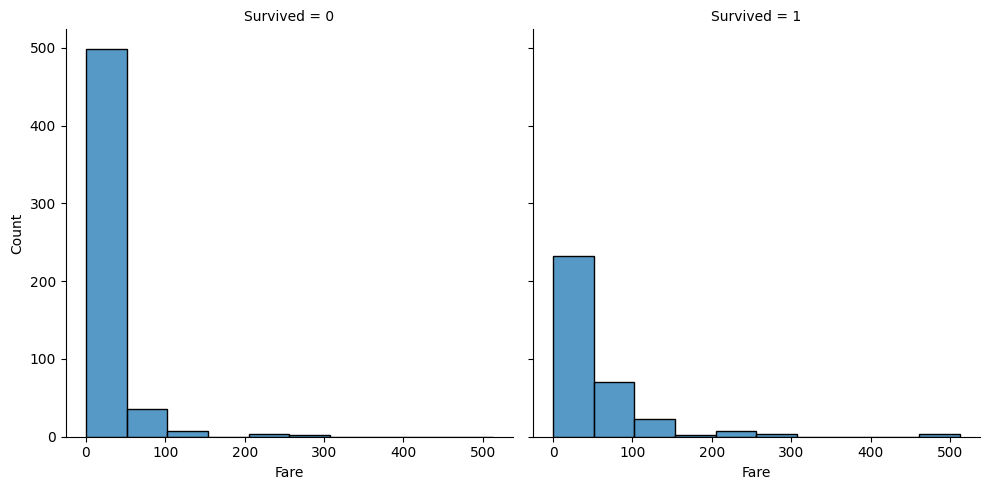

In [789]:
sns.displot(df_train,x='Fare',col='Survived',height=5,binwidth=50)
plt.show()

In [790]:
df_train["Fare_slice"] = pd.qcut(df_train['Fare'],6)
df_test["Fare_slice"] = pd.qcut(df_test['Fare'],6)
df_train.groupby("Fare_slice")['Survived'].mean()


/var/folders/72/4mtt73b16w9d91czh1zfsg540000gn/T/ipykernel_76016/2477788701.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby("Fare_slice")['Survived'].mean()


Fare_slice
(-0.001, 7.775]      0.205128
(7.775, 8.662]       0.190789
(8.662, 14.454]      0.366906
(14.454, 26.0]       0.436242
(26.0, 52.369]       0.417808
(52.369, 512.329]    0.697987
Name: Survived, dtype: float64

In [791]:
df_train.loc[df_train['Fare'] <= 7.775,'Fare'] = 0
df_train.loc[(df_train['Fare'] > 7.775) & (df_train['Fare'] <= 8.662),'Fare'] = 1
df_train.loc[(df_train['Fare'] > 8.662) & (df_train['Fare'] <= 14.454),'Fare'] = 2
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 26.0),'Fare'] = 3
df_train.loc[(df_train['Fare'] > 26.0) & (df_train['Fare'] <= 52.369),'Fare'] = 4
df_train.loc[(df_train['Fare'] > 52.369) & (df_train['Fare'] <=  512.329),'Fare'] = 5
df_train.loc[(df_train['Fare'] >  512.329),'Fare'] = 6

df_test.loc[df_test['Fare'] <= 7.775,'Fare'] = 0
df_test.loc[(df_test['Fare'] > 7.775) & (df_test['Fare'] <= 8.662),'Fare'] = 1
df_test.loc[(df_test['Fare'] > 8.662) & (df_test['Fare'] <= 14.454),'Fare'] = 2
df_test.loc[(df_test['Fare'] > 14.454) & (df_test['Fare'] <= 26.0),'Fare'] = 3
df_test.loc[(df_test['Fare'] > 26.0) & (df_test['Fare'] <= 52.369),'Fare'] = 4
df_test.loc[(df_test['Fare'] > 52.369) & (df_test['Fare'] <=  512.329),'Fare'] = 5
df_test.loc[(df_test['Fare'] >  512.329),'Fare'] = 6

In [792]:
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['Is_alone'] = df_train['Family_Size'].apply(lambda x: 1 if x==1 else 0)
df_test['Family_Size'] = df_test['SibSp'] + df_train['Parch'] + 1
df_test['Is_alone'] = df_test['Family_Size'].apply(lambda x: 1 if x==1 else 0)
df_train.groupby('Family_Size',as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [793]:
def family_category(size):
    if size == 1:
        return 'Alone'
    elif 2 <= size <= 4:
        return 'Small'
    elif 5 <= size <= 6:
        return 'Medium'
    else:
        return 'Huge'
df_train['Family_category'] = df_train['Family_Size'].apply(family_category)
df_test['Family_category'] = df_train['Family_Size'].apply(family_category)
df_train.groupby('Family_category',as_index=False)['Survived'].mean()

,Family_category,Survived
0,Alone,0.303538
1,Huge,0.160000
2,Medium,0.162162
3,Small,0.578767


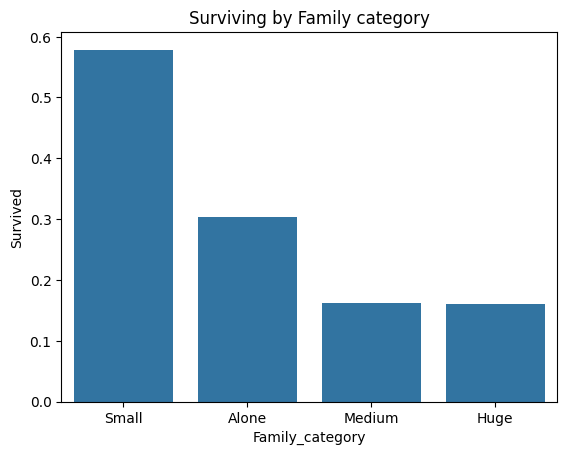

In [794]:
sns.barplot(x='Family_category',y='Survived',data=df_train,errorbar=None)
plt.title('Surviving by Family category')
plt.show()

In [795]:
def extract_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

df_train['Title'] = df_train['Name'].apply(extract_title)
df_test['Title'] = df_test['Name'].apply(extract_title)
df_train.groupby('Title')['Survived'].mean()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

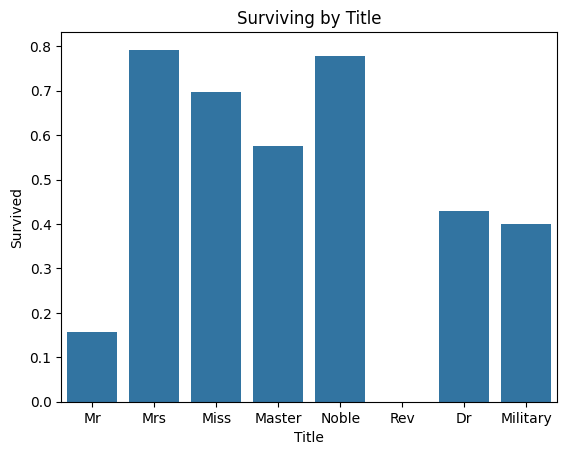

In [796]:
df_train['Title'] = df_train['Title'].replace(
    {
      'Col':'Military',
      'Major':'Military',
      'Capt':'Military',
      'Jonkheer' : 'Noble',
      'the Countess' : 'Noble',
      'Don' : 'Noble',
      'Lady' : 'Noble',
      'Sir' : 'Noble',
      'Mlle' : 'Noble',
      'Ms' : 'Noble',
      'Mme' : 'Noble'      
    }
)

df_test['Title'] = df_test['Title'].replace(
    {
      'Col':'Military',
      'Major':'Military',
      'Capt':'Military',
      'Jonkheer' : 'Noble',
      'the Countess' : 'Noble',
      'Don' : 'Noble',
      'Lady' : 'Noble',
      'Sir' : 'Noble',
      'Mlle' : 'Noble',
      'Ms' : 'Noble',
      'Mme' : 'Noble'      
    }
)
df_train.groupby('Title')['Survived'].agg(['mean','count'])
df_train.groupby('Title')['Survived'].mean()
sns.barplot(x='Title', y='Survived', data=df_train,estimator='mean',errorbar=None)
plt.title('Surviving by Title')
plt.show()

In [797]:
df_train['Name_lenght'] = df_train['Name'].apply(lambda x : len(x))
df_test['Name_lenght'] = df_test['Name'].apply(lambda x : len(x))
df_train["Name_slice"] = pd.qcut(df_train['Name_lenght'],8)
df_test["Name_slice"] = pd.qcut(df_test['Name_lenght'],8)
df_train.groupby('Name_slice')['Survived'].mean()

/var/folders/72/4mtt73b16w9d91czh1zfsg540000gn/T/ipykernel_76016/964945808.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby('Name_slice')['Survived'].mean()


Name_slice
(11.999, 18.0]    0.214286
(18.0, 20.0]      0.252427
(20.0, 23.0]      0.307692
(23.0, 25.0]      0.346939
(25.0, 27.25]     0.292929
(27.25, 30.0]     0.428571
(30.0, 38.0]      0.517241
(38.0, 82.0]      0.745283
Name: Survived, dtype: float64

In [798]:
df_train.loc[df_train['Name_lenght'] <= 18,'Name_Size'] = 0
df_train.loc[(df_train['Name_lenght'] > 18) & (df_train['Name_lenght'] <= 20),'Name_Size'] = 1
df_train.loc[(df_train['Name_lenght'] > 20) & (df_train['Name_lenght'] <= 23),'Name_Size'] = 2
df_train.loc[(df_train['Name_lenght'] > 23) & (df_train['Name_lenght'] <= 25),'Name_Size'] = 3
df_train.loc[(df_train['Name_lenght'] > 25) & (df_train['Name_lenght'] <= 27.25),'Name_Size'] = 4
df_train.loc[(df_train['Name_lenght'] > 27.25) & (df_train['Name_lenght'] <= 30),'Name_Size'] = 5
df_train.loc[(df_train['Name_lenght'] > 30) & (df_train['Name_lenght'] <= 38),'Name_Size'] = 6
df_train.loc[(df_train['Name_lenght'] > 38) & (df_train['Name_lenght'] <= 82),'Name_Size'] = 7
df_train.loc[(df_train['Name_lenght'] > 82),'Name_Size'] = 8

df_test.loc[df_test['Name_lenght'] <= 18,'Name_Size'] = 0
df_test.loc[(df_test['Name_lenght'] > 18) & (df_test['Name_lenght'] <= 20),'Name_Size'] = 1
df_test.loc[(df_test['Name_lenght'] > 20) & (df_test['Name_lenght'] <= 23),'Name_Size'] = 2
df_test.loc[(df_test['Name_lenght'] > 23) & (df_test['Name_lenght'] <= 25),'Name_Size'] = 3
df_test.loc[(df_test['Name_lenght'] > 25) & (df_test['Name_lenght'] <= 27.25),'Name_Size'] = 4
df_test.loc[(df_test['Name_lenght'] > 27.25) & (df_test['Name_lenght'] <= 30),'Name_Size'] = 5
df_test.loc[(df_test['Name_lenght'] > 30) & (df_test['Name_lenght'] <= 38),'Name_Size'] = 6
df_test.loc[(df_test['Name_lenght'] > 38) & (df_test['Name_lenght'] <= 82),'Name_Size'] = 7
df_test.loc[(df_test['Name_lenght'] > 82),'Name_Size'] = 8

In [799]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Age_slice,Fare_slice,Family_Size,Is_alone,Family_category,Title,Name_lenght,Name_slice,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,S,"(20.125, 24.0]","(-0.001, 7.775]",2,0,Small,Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,C,"(32.312, 38.0]","(52.369, 512.329]",2,0,Small,Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,S,"(24.0, 28.0]","(7.775, 8.662]",1,1,Alone,Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,S,"(32.312, 38.0]","(52.369, 512.329]",2,0,Small,Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,S,"(32.312, 38.0]","(7.775, 8.662]",1,1,Alone,Mr,24,"(23.0, 25.0]",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3.0,0,0,211536,2.0,...,S,"(24.0, 28.0]","(8.662, 14.454]",1,1,Alone,Rev,21,"(20.0, 23.0]",2.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,4.0,...,S,"(16.0, 20.125]","(26.0, 52.369]",1,1,Alone,Miss,28,"(27.25, 30.0]",5.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.0,...,S,NaN,"(14.454, 26.0]",4,0,Small,Miss,40,"(38.0, 82.0]",7.0
889,890,1,1,"Behr, Mr. Karl Howell",male,3.0,0,0,111369,4.0,...,C,"(24.0, 28.0]","(26.0, 52.369]",1,1,Alone,Mr,21,"(20.0, 23.0]",2.0


# The main features

### Survived - Pclass
Сorrelation coefficient = -0.338481
This is the strongest negative predictor. Passengers in a higher class (less than Pclass: 1) were significantly more likely to survive.

### Survived - Fare
Correlation coefficient = 0.257307
Higher fares (Fare) correlate with higher survival probability, which is logical since Fare is highly correlated with Pclass

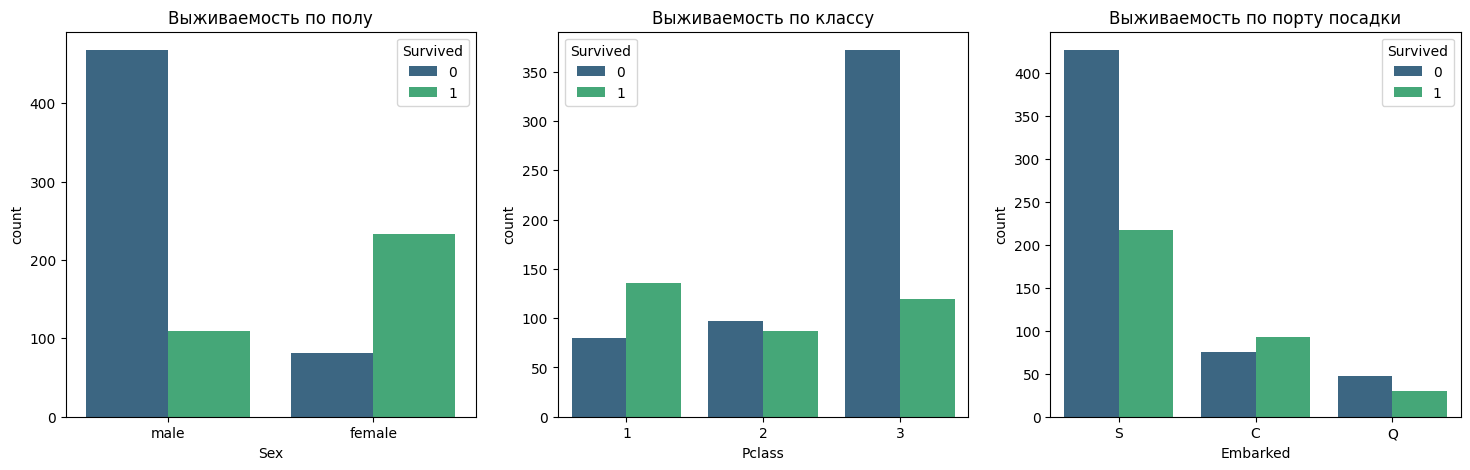

In [800]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=axes[0], palette='viridis')
axes[0].set_title('Выживаемость по полу')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=axes[1], palette='viridis')
axes[1].set_title('Выживаемость по классу')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=axes[2], palette='viridis')
axes[2].set_title('Выживаемость по порту посадки')

plt.show()

In [801]:

print("Анализ признака Ticket:")
print(f"Всего уникальных билетов: {df_train['Ticket'].nunique()}")
print(f"Всего пассажиров: {len(df_train)}")
print(f"Пассажиров с одинаковыми билетами: {len(df_train) - df_train['Ticket'].nunique()}")
print(df_train['Ticket'].head(10))


Анализ признака Ticket:
Всего уникальных билетов: 681
Всего пассажиров: 891
Пассажиров с одинаковыми билетами: 210
0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object


In [802]:
df_train['Ticket_Number'] = df_train['Ticket'].apply(lambda x : x.split()[-1])
df_test['Ticket_Number'] = df_test['Ticket'].apply(lambda x : x.split()[-1])
df_train.groupby(['Ticket_Number'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)
df_train['TicketNumberCounts'] = df_train.groupby('Ticket_Number')['Ticket_Number'].transform('count')
df_test['TicketNumberCounts'] = df_test.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [803]:
df_train.groupby('Ticket_Number')['Survived'].agg(['count','mean']).sort_values('count',ascending=False)

,count,mean
Ticket_Number,,
347082,7,0.000000
2343,7,0.000000
1601,7,0.714286
2144,6,0.000000
347088,6,0.000000
...,...,...
2662,1,0.000000
2663,1,1.000000
2664,1,0.000000


In [804]:
df_train['TicketLocation'] = np.where(df_train['Ticket'].str.split(pat=" ", expand=True)[1].notna(), df_train['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
df_test['TicketLocation'] = np.where(df_test['Ticket'].str.split(pat=" ", expand=True)[1].notna(), df_test['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [805]:
df_train['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [806]:
df_train['TicketLocation'] = df_train['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

df_test['TicketLocation'] = df_test['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

In [807]:
df_train.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


Выживаемость по количеству людей с одинаковым билетом:
                    Всего  Выжило  Процент выживаемости
TicketNumberCounts                                     
1                     544     161              0.295956
2                     188     107              0.569149
3                      66      47              0.712121
4                      44      22              0.500000
5                      10       0              0.000000
6                      18       0              0.000000
7                      21       5              0.238095


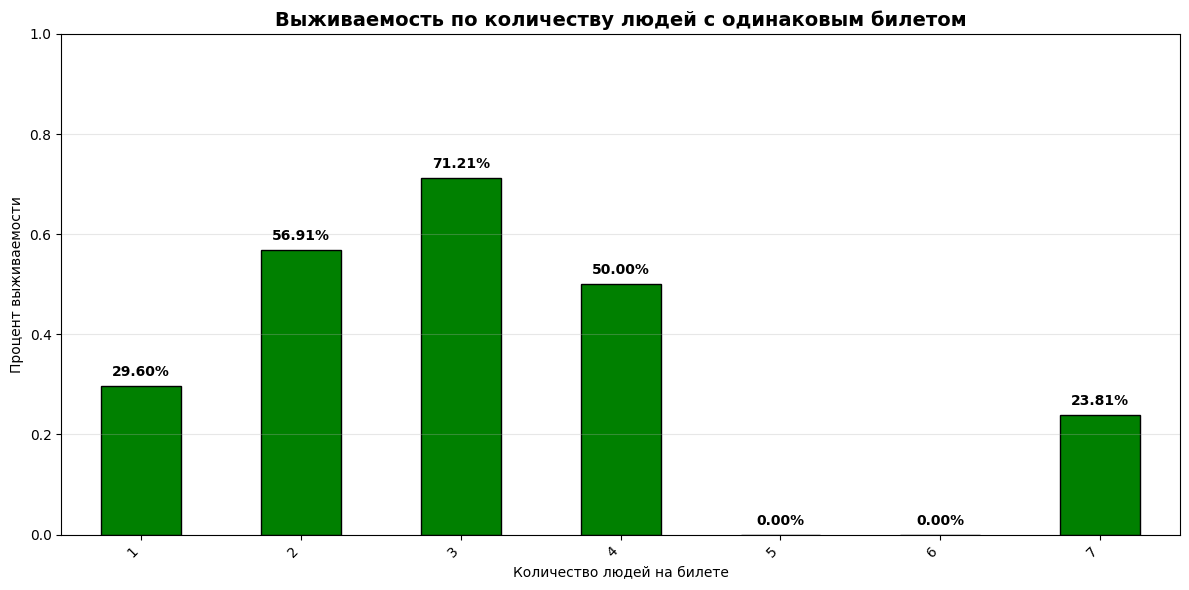

In [808]:
ticket_count_survival = df_train.groupby('TicketNumberCounts')['Survived'].agg(['count', 'sum', 'mean'])
ticket_count_survival.columns = ['Всего', 'Выжило', 'Процент выживаемости']
print("Выживаемость по количеству людей с одинаковым билетом:")
print(ticket_count_survival)

# Визуализация
plt.figure(figsize=(12, 6))
ticket_count_survival['Процент выживаемости'].plot(kind='bar', color='green', edgecolor='black')
plt.title('Выживаемость по количеству людей с одинаковым билетом', fontsize=14, fontweight='bold')
plt.xlabel('Количество людей на билете')
plt.ylabel('Процент выживаемости')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(ticket_count_survival['Процент выживаемости']):
    if not pd.isna(v):
        plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


Выживаемость по титулам:
          Всего  Выжило  Процент выживаемости
Title                                        
Mrs         125      99              0.792000
Noble         9       7              0.777778
Miss        182     127              0.697802
Master       40      23              0.575000
Dr            7       3              0.428571
Military      5       2              0.400000
Mr          517      81              0.156673
Rev           6       0              0.000000


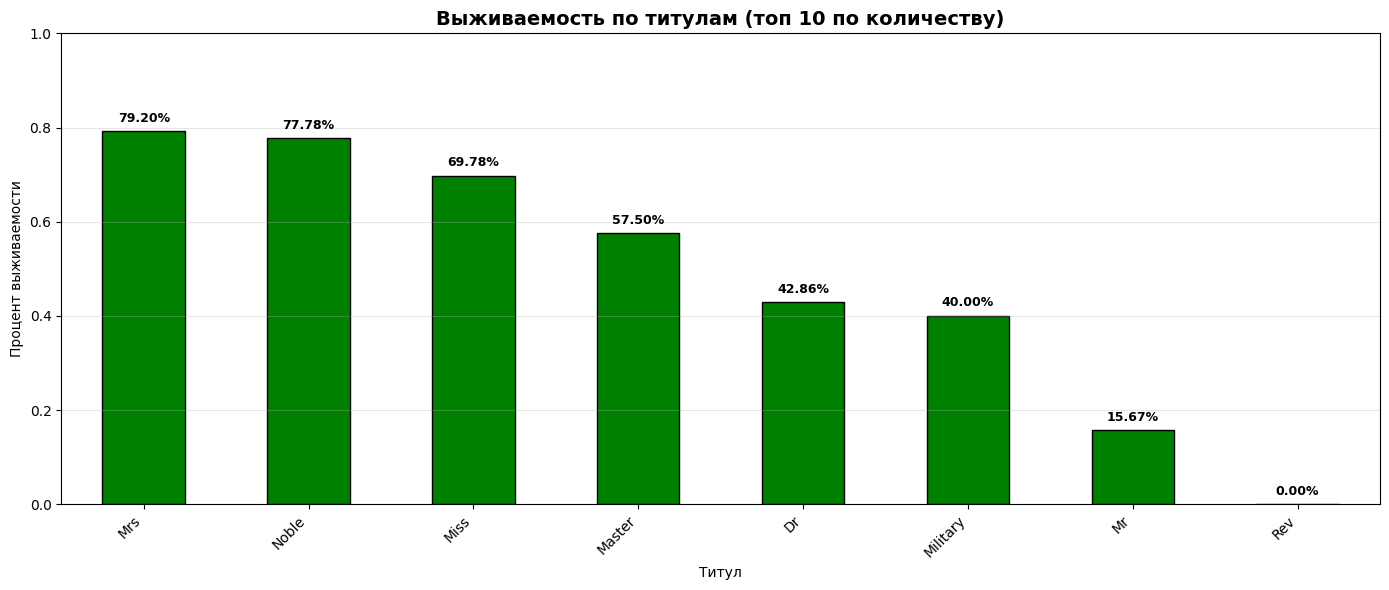

In [809]:
title_survival = df_train.groupby('Title')['Survived'].agg(['count', 'sum', 'mean'])
title_survival.columns = ['Всего', 'Выжило', 'Процент выживаемости']
title_survival = title_survival.sort_values('Процент выживаемости', ascending=False)
print("Выживаемость по титулам:")
print(title_survival)

top_titles = df_train['Title'].value_counts().head(10).index
title_survival_top = title_survival[title_survival.index.isin(top_titles)]

plt.figure(figsize=(14, 6))
title_survival_top['Процент выживаемости'].plot(kind='bar', color='green', edgecolor='black')
plt.title('Выживаемость по титулам (топ 10 по количеству)', fontsize=14, fontweight='bold')
plt.xlabel('Титул')
plt.ylabel('Процент выживаемости')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(title_survival_top['Процент выживаемости']):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.show()


### Handling missing values

#### Age dependence analysis of others features

In [810]:
print('The number of people whose age is known',df_train['Age'].count())
print('The number of people whose age is not known',df_train['Age'].isna().count() - df_train['Age'].count())

The number of people whose age is known 714
The number of people whose age is not known 177


In [811]:
print('Median age analysis by',df_train.groupby('Pclass')['Age'].median())

Median age analysis by Pclass
1    5.0
2    4.0
3    2.0
Name: Age, dtype: float64


In [812]:
print('Median age analysis by',df_train.groupby('Sex')['Age'].median())

Median age analysis by Sex
female    3.0
male      4.0
Name: Age, dtype: float64


In [813]:
print('Median age analysis by',df_train.groupby('Title')['Age'].median())

Median age analysis by Title
Dr          6.5
Master      0.0
Military    7.0
Miss        2.0
Mr          4.0
Mrs         5.0
Noble       5.0
Rev         6.5
Name: Age, dtype: float64


In [814]:
print('Median age analysis by',df_train.groupby(['Pclass','Sex'])['Age'].median())

Median age analysis by Pclass  Sex   
1       female    5.0
        male      6.0
2       female    3.0
        male      4.0
3       female    2.0
        male      3.0
Name: Age, dtype: float64


In [815]:
print('Median age analysis by',df_train.groupby(['Pclass','Title'])['Age'].median())

Median age analysis by Pclass  Title   
1       Dr          6.5
        Master      0.0
        Military    7.0
        Miss        4.0
        Mr          6.0
        Mrs         6.0
        Noble       5.0
2       Dr          4.5
        Master      0.0
        Miss        2.0
        Mr          4.0
        Mrs         4.0
        Noble       3.0
        Rev         6.5
3       Master      0.0
        Miss        1.0
        Mr          3.0
        Mrs         4.0
Name: Age, dtype: float64


In [816]:
df_train['Cabin'] = df_train['Cabin'].fillna('U')
df_train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in df_train['Cabin']])

df_test['Cabin'] = df_test['Cabin'].fillna('U')
df_test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in df_test['Cabin']])
df_train['Cabin_Assigned'] = df_train['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
df_test['Cabin_Assigned'] = df_test['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
df_train.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])
def deck_group(deck):
    if deck in ['A', 'B', 'C']:
        return 'Upper'
    elif deck in ['D', 'E', 'F']:
        return 'Middle'
    else:
        return 'Lower'

df_train['Deck'] = df_train['Cabin'].apply(deck_group)
df_test['Deck'] = df_test['Cabin'].apply(deck_group)
print(df_train.groupby('Deck')['Survived'].mean())

Deck
Lower     0.300578
Middle    0.730769
Upper     0.636364
Name: Survived, dtype: float64


### Выводы по обработке пропущенных значений:

1. **Age**: 
   - Заполнено медианой по группам (Pclass + Sex + Title → Pclass + Sex → общая медиана)
   - Распределение сохранено, статистики не сильно изменились
   - Одинаково применено к train и test

2. **Embarked**:
   - Заполнено модой (наиболее частое значение)
   - Оба пассажира с пропуском были из 1-го класса с Fare=80.0

3. **Fare**:
   - В test.csv заполнено медианой по Pclass + Embarked (или только по Pclass)
   - Учитывает связь между ценой билета и классом

4. **Cabin**:
   - Используются производные признаки (is_Cabin, Id_cabin, Cabin_Count)
   - Исходный признак не заполняется из-за большого количества пропусков (77%)
   - Производные признаки информативны и не требуют заполнения пропусков


#### Embarked dependence analysis of others features

In [817]:
print("Embedded Distribution by Pclass ")
print(df_train.groupby('Pclass')['Embarked'].value_counts())

Embedded Distribution by Pclass 
Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64


In [818]:
print("Embedded Distribution by Fare ")
print(df_train.groupby('Embarked')['Fare'].mean())

Embedded Distribution by Fare 
Embarked
C    3.285714
Q    1.103896
S    2.456522
Name: Fare, dtype: float64


In [819]:
print(df_train.groupby('Survived')['Embarked'].value_counts())

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64


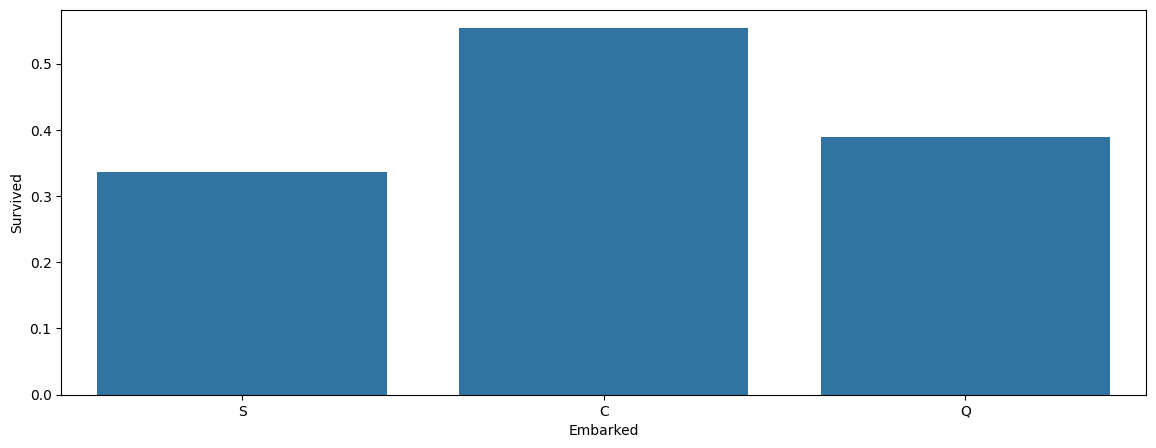

In [820]:
plt.figure(figsize=(14, 5))
sns.barplot(x='Embarked', y='Survived', data=df_train, estimator='mean', errorbar=None)
plt.show()

### Data preparation for modeling

One-hot Encoding - Embarked Id cabin

In [821]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Age_slice           714 non-null    category
 13  Fare_slice          891 non-null    category
 14  Family_Size         891 non-null    int64   
 15  Is_alone            891 non-null    int6

In [822]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 332 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                417 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  Age_slice           332 non-null    category
 12  Fare_slice          417 non-null    category
 13  Family_Size         418 non-null    float64 
 14  Is_alone            418 non-null    int64   
 15  Family_category     418 non-null    obje

#### Processing the missed features

In [823]:
df_train['Age'].info()
df_test['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
332 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [824]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())



In [825]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family_category,Title,Name_lenght,Name_slice,Name_Size,Ticket_Number,TicketNumberCounts,TicketLocation,Cabin_Assigned,Deck
0,892,3,"Kelly, Mr. James",male,5.000000,0,0,330911,1.0,U,...,Small,Mr,16,"(12.999, 18.0]",0.0,330911,1,Blank,0,Lower
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6.000000,1,0,363272,0.0,U,...,Small,Mrs,32,"(30.75, 41.0]",6.0,363272,1,Blank,0,Lower
2,894,2,"Myles, Mr. Thomas Francis",male,7.000000,0,0,240276,2.0,U,...,Alone,Mr,25,"(23.0, 25.0]",3.0,240276,1,Blank,0,Lower
3,895,3,"Wirz, Mr. Albert",male,3.000000,0,0,315154,2.0,U,...,Small,Mr,16,"(12.999, 18.0]",0.0,315154,1,Blank,0,Lower
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.000000,1,1,3101298,2.0,U,...,Alone,Mrs,44,"(41.0, 63.0]",7.0,3101298,1,Blank,0,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,3.533133,0,0,A.5. 3236,1.0,U,...,Alone,Mr,18,"(12.999, 18.0]",0.0,3236,1,A/5,0,Lower
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,6.000000,0,0,PC 17758,5.0,C,...,Alone,Dona,28,"(27.0, 30.75]",5.0,17758,1,PC,1,Upper
415,1307,3,"Saether, Mr. Simon Sivertsen",male,6.000000,0,0,SOTON/O.Q. 3101262,0.0,U,...,Alone,Mr,28,"(27.0, 30.75]",5.0,3101262,1,SOTON/OQ,0,Lower
416,1308,3,"Ware, Mr. Frederick",male,3.533133,0,0,359309,1.0,U,...,Small,Mr,19,"(18.0, 20.0]",1.0,359309,1,Blank,0,Lower


In [826]:
one_hot = OneHotEncoder(sparse_output=False)
ord_en = OrdinalEncoder()
inp_en = SimpleImputer(strategy='mean')

In [827]:
ord_col = ['Family_category'] # small alone ...
one_hot = ['Age','Embarked'] # 1 0

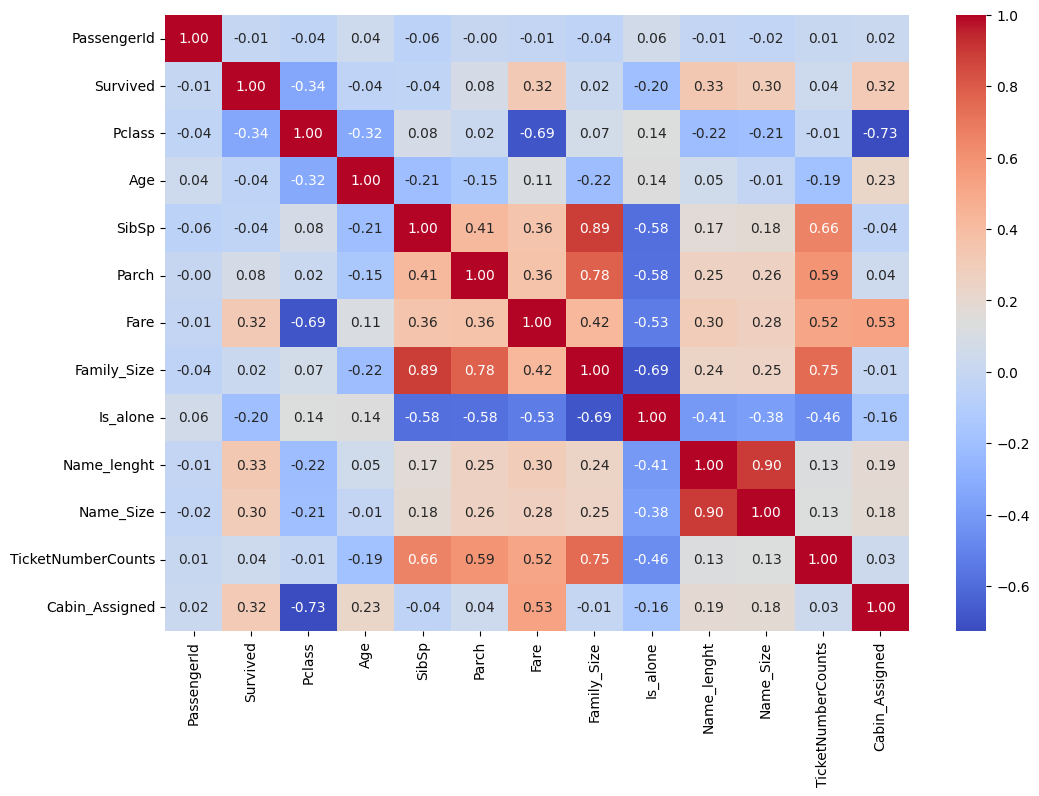

In [828]:
correlation_matrix = df_train.corr(numeric_only=True)

plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [829]:
X = df_train.drop(['Survived', 'SibSp', 'Parch'], axis=1)
Y = df_train['Survived']
X_test = df_test.drop(['Age_slice', 'Fare_slice', 'SibSp', 'Parch'], axis=1)


In [830]:
X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size=0.2,random_state=21,stratify=Y)

In [831]:
X_train

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Age_slice,...,Family_category,Title,Name_lenght,Name_slice,Name_Size,Ticket_Number,TicketNumberCounts,TicketLocation,Cabin_Assigned,Deck
67,68,3,"Crease, Mr. Ernest James",male,1.000000,S.P. 3464,1.0,U,S,"(16.0, 20.125]",...,Alone,Mr,24,"(23.0, 25.0]",3.0,3464,1,S.P.,0,Lower
154,155,3,"Olsen, Mr. Ole Martin",male,3.462185,Fa 265302,0.0,U,S,NaN,...,Alone,Mr,21,"(20.0, 23.0]",2.0,265302,1,Fa,0,Lower
883,884,2,"Banfield, Mr. Frederick James",male,3.000000,C.A./SOTON 34068,2.0,U,S,"(24.0, 28.0]",...,Alone,Mr,29,"(27.25, 30.0]",5.0,34068,1,C.A./SOTON,0,Lower
499,500,3,"Svensson, Mr. Olof",male,2.000000,350035,1.0,U,S,"(20.125, 24.0]",...,Alone,Mr,18,"(11.999, 18.0]",0.0,350035,1,Blank,0,Lower
519,520,3,"Pavlovic, Mr. Stefo",male,4.000000,349242,1.0,U,S,"(28.0, 32.312]",...,Alone,Mr,19,"(18.0, 20.0]",1.0,349242,1,Blank,0,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,575,3,"Rush, Mr. Alfred George John",male,0.000000,A/4. 20589,1.0,U,S,"(0.419, 16.0]",...,Alone,Mr,28,"(27.25, 30.0]",5.0,20589,1,A/4,0,Lower
247,248,2,"Hamalainen, Mrs. William (Anna)",female,2.000000,250649,3.0,U,S,"(20.125, 24.0]",...,Small,Mrs,31,"(30.0, 38.0]",6.0,250649,2,Blank,0,Lower
188,189,3,"Bourke, Mr. John",male,6.000000,364849,3.0,U,Q,"(38.0, 47.0]",...,Small,Mr,16,"(11.999, 18.0]",0.0,364849,2,Blank,0,Lower
328,329,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,4.000000,363291,3.0,U,S,"(28.0, 32.312]",...,Small,Mrs,46,"(38.0, 82.0]",7.0,363291,3,Blank,0,Lower


In [832]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [833]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [834]:
from sklearn.compose import ColumnTransformer


col_trans = ColumnTransformer(transformers=[
 ('impute', inp_en, ['Age']),
 ('ord_pipeline', ordinal_pipeline, ord_col),
 ('ohe_pipeline', ohe_pipeline, one_hot),
  ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])
 ],
 remainder='drop',
 n_jobs=-1)

#### Базовые модели

In [835]:
base_model = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


In [836]:
param_grid = [
    {'Logistic Regression' : 
        {'C' : [0.0001, 0.001, 0.1, 1, 10, 100]}
    },
    {
        'K-Nearest Neighbors' :
        {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]  # Minkowski
        }
    },
    {
    'Naive Bayes' :
    {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }
    }
]


In [837]:
CV_lr = GridSearchCV(estimator=base_model['Logistic Regression'], param_grid=param_grid[0]['Logistic Regression'], cv=StratifiedKFold(n_splits=5))

In [838]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Age', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [0.0001, 0.001, 0.1, 1, 10,
                                                100]}))])

In [839]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.743011917659805


In [840]:

CV_knn = GridSearchCV(estimator=base_model['K-Nearest Neighbors'], param_grid=param_grid[1]['K-Nearest Neighbors'], cv=StratifiedKFold(n_splits=5))

In [841]:
pipe_knn= make_pipeline(col_trans, CV_knn)
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [842]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.7626908302964641


In [843]:
CV_nb = GridSearchCV(estimator=base_model['Naive Bayes'], param_grid=param_grid[2]['Naive Bayes'], cv=StratifiedKFold(n_splits=5))

In [844]:
pipe_nb= make_pipeline(col_trans, CV_nb)
pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Age', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-09, 1e-08,
                                                            1e-07]}))])

In [845]:
print(CV_nb.best_params_)
print(CV_nb.best_score_)


{'var_smoothing': 1e-09}
0.7107652910469812


In [846]:
X_test['Fare']

0      1.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
413    1.0
414    5.0
415    0.0
416    1.0
417    3.0
Name: Fare, Length: 418, dtype: float64

In [847]:
X_test['Fare'].isnull().sum()

0

In [848]:
Y_pred1 = pipefinallr.predict(X_test)
Y_pred2 = pipe_knn.predict(X_test)
Y_pred3 = pipe_nb.predict(X_test)

#### Деревья решений и ансамбли

In [849]:
tree_model = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

In [876]:
param_grid_tree = [
    {'RandomForestClassifier' : 
        {'n_estimators' : [150,200,300,500],
         'max_depth' : [10,15,18,20],
         'min_samples_split' : [5,10,15],
         'min_samples_leaf' : [2,4,5,6],
         'criterion': ['gini', 'entropy']}
    },
    {
        'DecisionTreeClassifier' :
        {
            'min_samples_split': [5, 10, 15],
            'max_depth': [10, 20, 30],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy'],

        }
    },
    {
    'ExtraTreeClassifier' :
    {
        "max_features": [1, 3, 10],
        "min_samples_split": [2, 3, 10],
        "min_samples_leaf": [1, 3, 10],
        'criterion': ['gini', 'entropy'],

    }
    },
    {
    'GradientBoostingClassifier' : 
    {
        'n_estimators' : [300, 400, 500],
        'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
        'max_depth': [8, 10, 12],
        'min_samples_leaf': [50, 100, 120, 150],
        'max_features': [0.1, 0.3, 0.5],

    }
    }
]


In [877]:
CV_ran = GridSearchCV(estimator=tree_model['RandomForestClassifier'], param_grid=param_grid_tree[0]['RandomForestClassifier'] , cv=StratifiedKFold(n_splits=5))
CV_dec = GridSearchCV(estimator=tree_model['DecisionTreeClassifier'], param_grid=param_grid_tree[1]['DecisionTreeClassifier'] , cv=StratifiedKFold(n_splits=5))
CV_ex = GridSearchCV(estimator=tree_model['ExtraTreeClassifier'], param_grid=param_grid_tree[2]['ExtraTreeClassifier'] , cv=StratifiedKFold(n_splits=5))
CV_gr = GridSearchCV(estimator=tree_model['GradientBoostingClassifier'], param_grid=param_grid_tree[3]['GradientBoostingClassifier'], cv=StratifiedKFold(n_splits=5))

In [866]:
pipe_gr= make_pipeline(col_trans, CV_gr)
pipe_gr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.1, 0.3, 0.6, 1.0],
                                          'max_depth': [8, 10, 12],
                                          'max_features': [0.1, 0.3, 0.5],
                                          'min_samples_leaf': [50, 100, 120,
                                                               150],
                                          'n_estimators': [300, 400, 500]}))])

In [868]:
print(CV_gr.best_params_)
print(CV_gr.best_score_)
Y_pred4 = pipe_gr.predict(X_test)


{'learning_rate': 0.1, 'max_depth': 12, 'max_features': 0.1, 'min_samples_leaf': 50, 'n_estimators': 300}
0.7780951442923273


In [869]:

pipe_ran= make_pipeline(col_trans, CV_ran)
pipe_ran.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 15, 18, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [870]:
print(CV_ran.best_params_)
print(CV_ran.best_score_)
Y_pred5 = pipe_ran.predict(X_test)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
0.7738894907908993


In [912]:
pipe_dec= make_pipeline(col_trans, CV_dec)
pipe_dec.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [913]:
print(CV_dec.best_params_)
print(CV_dec.best_score_)
Y_pred6 = pipe_dec.predict(X_test)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 15}
0.7555402344134738


In [878]:
pipe_ex= make_pipeline(col_trans, CV_ex)
pipe_ex.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=ExtraTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_features': [1, 3, 10],
                                          'min_samples_leaf': [1, 3, 10],
                                          'min_samples_split': [2, 3, 10]}))])

In [879]:
print(CV_ex.best_params_)
print(CV_ex.best_score_)
Y_pred7 = pipe_ex.predict(X_test)

{'criterion': 'entropy', 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.7430217669654289


In [881]:
param_grid_svm = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}
svc = SVC(probability=True)
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svm, cv=StratifiedKFold(n_splits=5))
pipe_svc = make_pipeline(col_trans, CV_svc)
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                                                 sparse_output=False))]),
                                                  ['Age', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [882]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)
Y_pred8 = pipe_svc.predict(X_test)

{'C': 10, 'kernel': 'rbf'}
0.7682753865852457


In [889]:
CV_svc.best_estimator_

SVC(C=10, probability=True)

In [897]:
vc1 = VotingClassifier([('gr',GradientBoostingClassifier(learning_rate=0.1,max_depth=12,max_features=0.1,min_samples_leaf=50,n_estimators=300) ),
                        ('ran', RandomForestClassifier(criterion='entropy',max_depth=15,min_samples_leaf=2,min_samples_split=15,n_estimators=150) ),
                          ('svc', SVC(C=10,kernel='rbf'))
                         ], voting='hard', weights=[1,2,3] )
#{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 150}
#{'learning_rate': 0.1, 'max_depth': 12, 'max_features': 0.1, 'min_samples_leaf': 50, 'n_estimators': 300}

 

In [898]:
pipefinalcv1 = make_pipeline(col_trans, vc1)


In [899]:
pipefinalcv1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_category']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImpute...
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('gr',
                                               GradientBoostingClassifier(max_depth=12,
                                                                          max_features=0.1,
                                                                          min_samples_leaf=50,
                                                                          n_estimators=300)),
                                              ('ran',
                                               RandomForestClassifier(criterion='entropy',
                                                                      max_depth=15,
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=15,
                                                                      n_estimators=150)),
                                              ('svc', SVC(C=10))],
                                  weights=[1, 2, 3]))])

In [900]:
Y_pred9 = pipefinalcv1.predict(X_test)

In [ ]:
df_1 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred1
})
df_2 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred2
})
df_3 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred3
})
df_4 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred4
})
df_5 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred5
})
df_6 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred6
})
df_7 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred7
})
df_8 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred8
})
df_9 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived' : Y_pred9
})

In [916]:
df_1.to_csv('df_1.csv', index=False)
df_2.to_csv('df_2.csv', index=False)
df_3.to_csv('df_3.csv', index=False)
df_4.to_csv('df_4.csv', index=False)
df_5.to_csv('df_5.csv', index=False)
df_6.to_csv('df_6.csv', index=False)
df_7.to_csv('df_7.csv', index=False)
df_8.to_csv('df_8.csv', index=False)
df_9.to_csv('df_9.csv', index=False)
